# Beispiel California-Hauspreise
------------------------------------------------

## Notwendige Bibliotheken laden

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung
* sklearn für ML-Algorithmen


In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from scipy import stats
import warnings
warnings.simplefilter("ignore")

## Daten einlesen und Überblick verschaffen (simple Metadaten)


In [343]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Datensatz housing.csv - Metadaten*
---------------------------------------------------

This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.
This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The current version of this dataset is taken from: https://github.com/ageron/handson-ml/tree/master/datasets/housing

In [344]:
df.shape

(20640, 10)

In [345]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [346]:
df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch

## Statistik Übersicht

In [347]:
description = df.describe()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


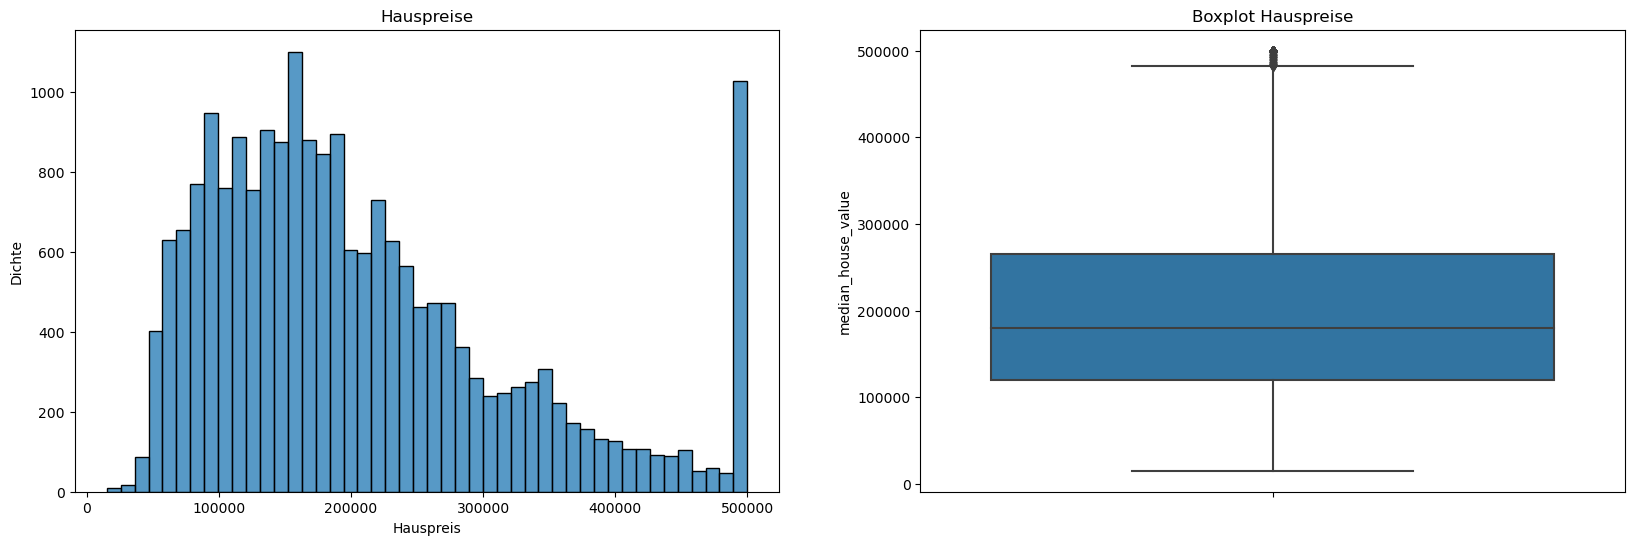

In [348]:
def histplot_house_vals():
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title('Hauspreise')
    sns.histplot(df['median_house_value'])
    plt.xlabel('Hauspreis')
    plt.ylabel('Dichte')
    plt.subplot(1,2,2)
    plt.title('Boxplot Hauspreise')
    sns.boxplot(y=df['median_house_value'])
    plt.show()

histplot_house_vals()

In [349]:
category = df['ocean_proximity'].unique()
print("Kategorien in Experience Level: ", category)

Kategorien in Experience Level:  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [350]:

# pip3 install --upgrade nbformat
px.scatter_mapbox(data_frame=df,
                  lat="latitude",
                  lon="longitude", 
                  mapbox_style="open-street-map",
                  color="median_house_value",
                  height=1000,
                  )

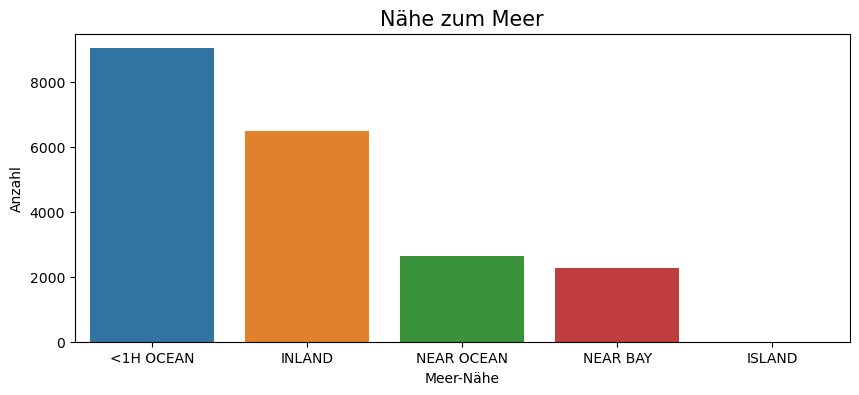

In [351]:
# Balkendiagramm mit seaborn countplot
plt.figure(figsize=(10,4))
sns.countplot(data = df, x = 'ocean_proximity', order = df['ocean_proximity'].value_counts().index)
plt.title("Nähe zum Meer",fontsize=15)
plt.xlabel("Meer-Nähe",fontsize=10)
plt.ylabel("Anzahl",fontsize=10)
plt.show()

## Kategorisieren der Daten

* Einsortierung der Hauspreise in Kategorien nach Quartilen
* Ziel: Trainings- und Testdaten erhalten gleiche (oder zumindest möglichst ähnliche) Verteilung der Zielvariable median_house_value

In [352]:
bins = [0] + list(description["median_house_value"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) 
# 0 bis 119.500 = 0 - 25% Quartil, 119.500 bis 179.700 = 25 - 50% Quartil, ...

[0, 119500, 179700, 264700, inf]


In [353]:
df["house_cat"] = pd.cut(
    df["median_house_value"],
    bins=bins, labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"])

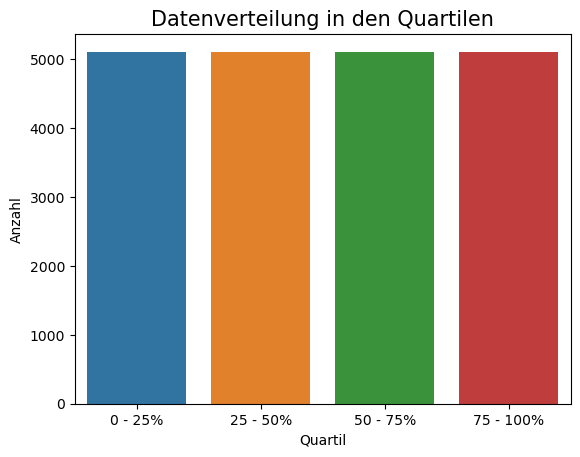

In [354]:
sns.countplot(data=df, x="house_cat")
plt.title("Datenverteilung in den Quartilen",fontsize=15)
plt.xlabel("Quartil",fontsize=10)
plt.ylabel("Anzahl",fontsize=10)
plt.show()

## Splitten in Trainings- und Testdatensatz

In [355]:
# löschen der unwichtigen columns 
df = df.drop("longitude", axis=1)
df = df.drop("latitude", axis=1)
df.columns


Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity',
       'house_cat'],
      dtype='object')

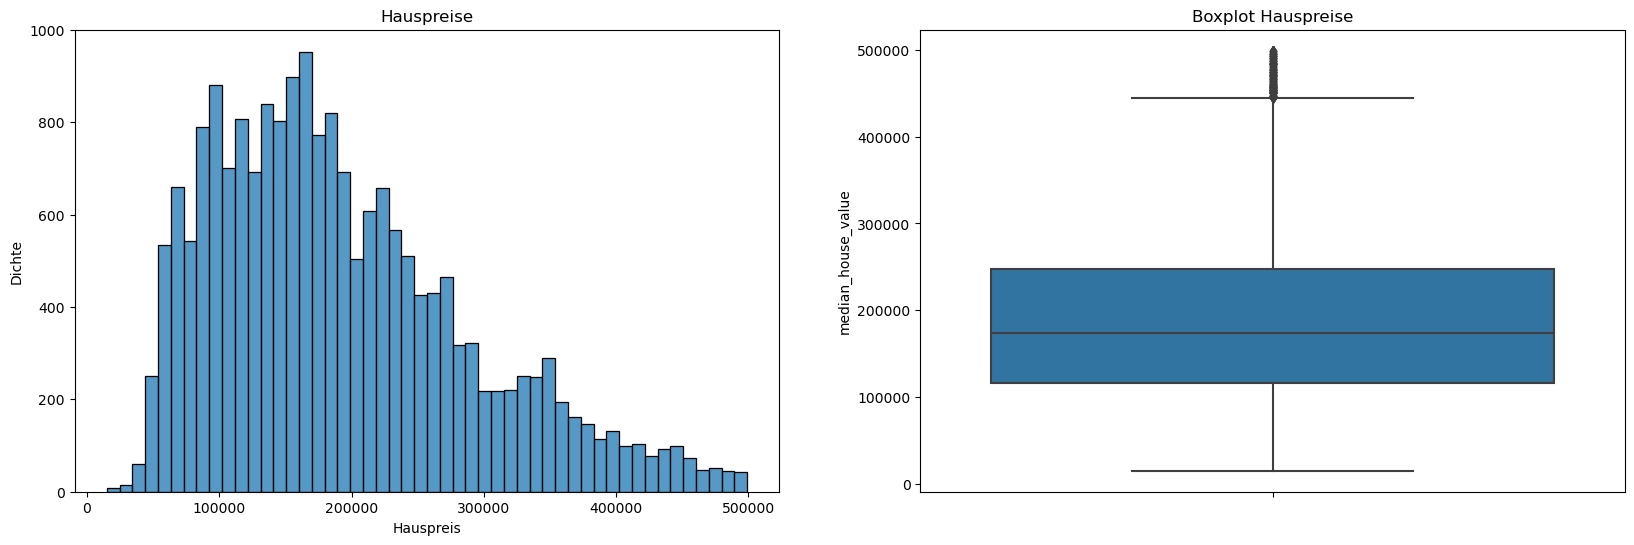

In [356]:
# Löschen der Hasupreise > 500k
df = df[(df['median_house_value'] <=499999)]
histplot_house_vals()

In [357]:
# Islands hat zu wenig werte
df = df[df["ocean_proximity"] != "ISLAND"]
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_cat
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,75 - 100%
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,75 - 100%
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,75 - 100%
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,75 - 100%
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,75 - 100%
...,...,...,...,...,...,...,...,...,...
20428,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0 - 25%
20429,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0 - 25%
20430,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0 - 25%
20431,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0 - 25%


In [358]:
# dummies
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df = dummies("ocean_proximity", df)
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,house_cat,INLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,75 - 100%,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,75 - 100%,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,75 - 100%,False,True,False
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,75 - 100%,False,True,False
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,75 - 100%,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20428,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0 - 25%,True,False,False
20429,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0 - 25%,True,False,False
20430,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0 - 25%,True,False,False
20431,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0 - 25%,True,False,False


In [359]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=6)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]

<AxesSubplot:xlabel='house_cat', ylabel='count'>

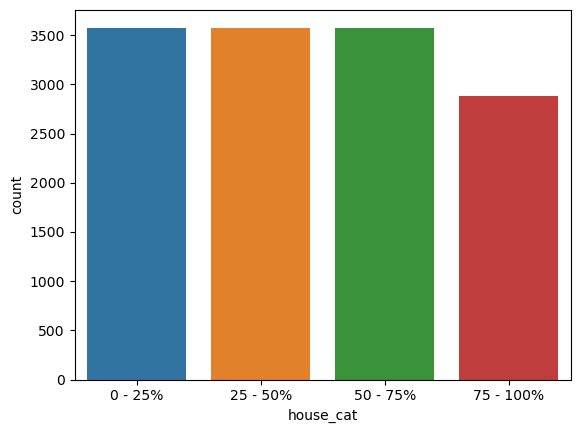

In [360]:
# Verteilung im Trainingsdatensatz
sns.countplot(data=df_train, x="house_cat")

<AxesSubplot:xlabel='house_cat', ylabel='count'>

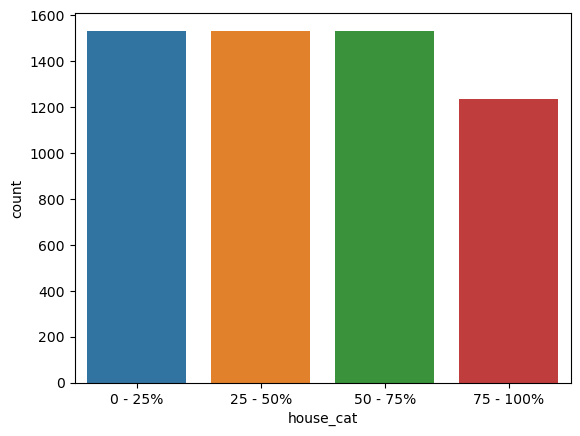

In [361]:
# Verteilung im Testdatensatz
sns.countplot(data=df_test, x="house_cat")

In [362]:
# Löschen der Hilfsvariable 'house_cat' aus den gesplitteten Datensätzen
df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)

In [363]:
scaler = MinMaxScaler()
num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,NEAR BAY,NEAR OCEAN
18746,0.078431,0.243196,0.278189,0.129404,0.294623,0.274631,0.402811,False,True,False
14821,0.588235,0.050440,0.044781,0.022478,0.055825,0.418243,0.359638,False,False,False
10771,0.294118,0.106883,0.101160,0.072564,0.123226,0.392870,0.507128,False,False,False
1296,0.450980,0.057562,0.093750,0.034642,0.100822,0.106288,0.175585,True,False,False
9136,0.392157,0.042250,0.048486,0.024048,0.051158,0.144915,0.159473,True,False,False


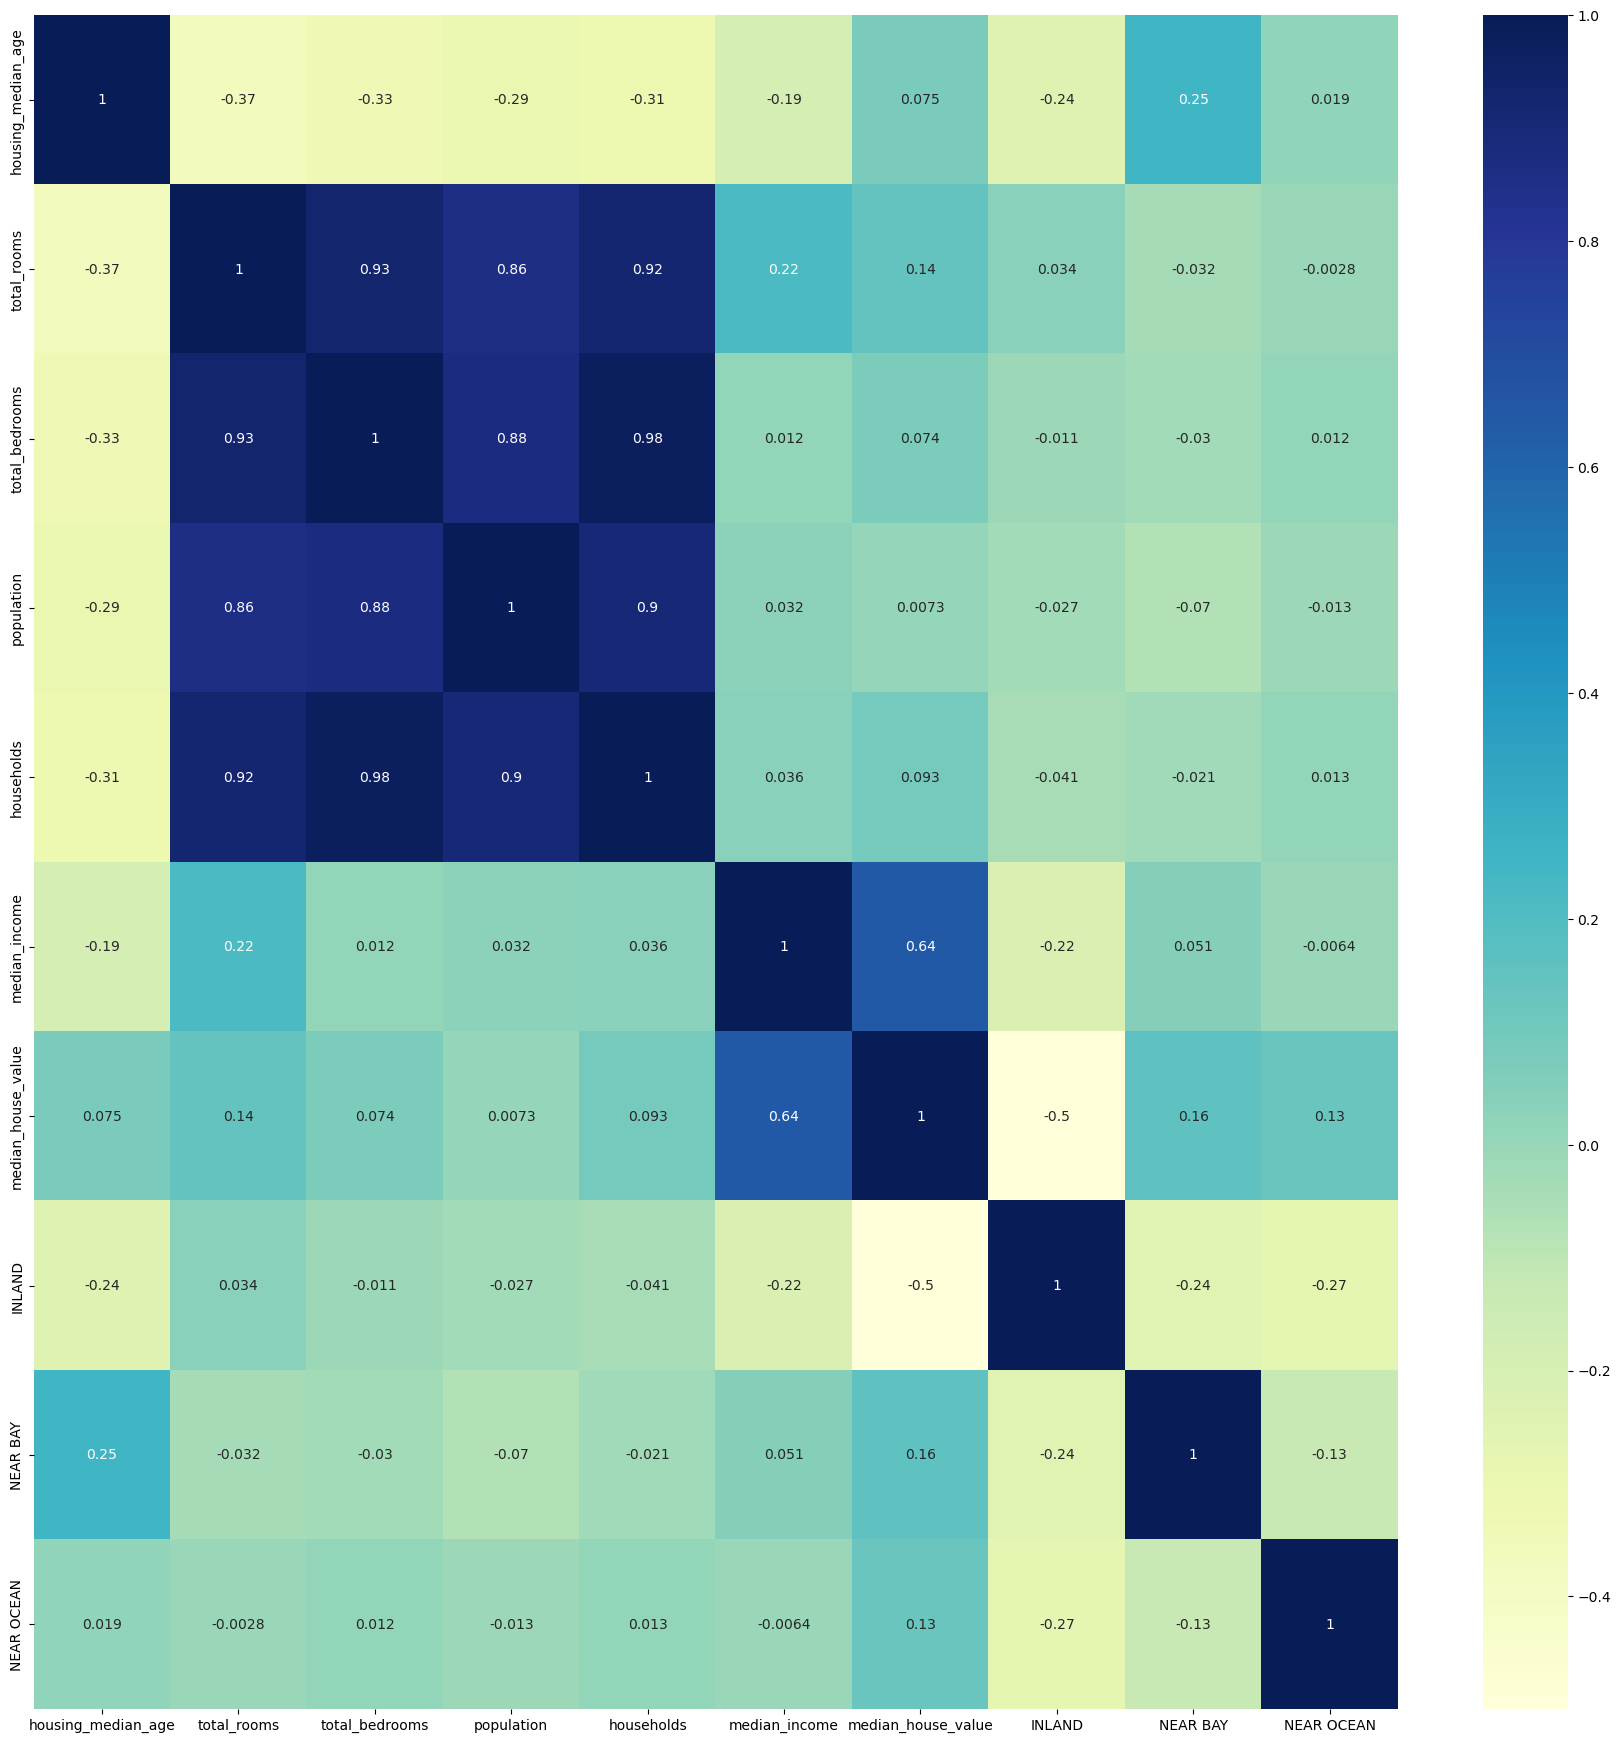

In [364]:
# KorrelationsHeatmap 
plt.figure(figsize = (22, 22))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
# zeigt,dass vor allem income mit house value korreliert. 
# Aber das soll ja RFE herausfinden (?).

In [365]:
# x,y bestimmen
y_train = df_train.pop('median_house_value')
X_train = df_train
# df_train

In [366]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(
    lm,
    # n_features_to_select=3
    )
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['total_rooms', 'population', 'households', 'median_income'], dtype='object')

In [371]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
# X_train_rfe = X_train['median_income']
X_train_rfe

,total_rooms,population,households,median_income
18746,0.243196,0.129404,0.294623,0.274631
14821,0.050440,0.022478,0.055825,0.418243
10771,0.106883,0.072564,0.123226,0.392870
1296,0.057562,0.034642,0.100822,0.106288
9136,0.042250,0.024048,0.051158,0.144915
...,...,...,...,...
12582,0.140433,0.080720,0.243279,0.148177
20381,0.048736,0.026206,0.081591,0.106723
11828,0.122857,0.084335,0.231143,0.116316
9406,0.117363,0.048824,0.147872,0.129315


In [372]:
#function Modellbildung
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#function Prüfen des variance inflation factors (zeigt Kolinearität)
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     3071.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:41:17   Log-Likelihood:                 6926.6
No. Observations:               13610   AIC:                        -1.384e+04
Df Residuals:                   13605   BIC:                        -1.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0588      0.004     16.765

## Übersicht über Zusammenhänge in den Daten (grafisch)

## Zusammenfassung von Variablen zu einer neuen Variable (weil Abhängigkeiten bestehen) 

a) Empfehlung Zusammenfassung Verhältnis total bedrooms/total rooms

b) Empfehlung Zusammenfassung Verhältnis population/households

--> sowohl für train als auch für test data!

## Starten der ML-Analyse - Lineare Regression

1) Dummy variables einführen bei Regressionsverfahren! (pd.get_dummies(df))
2) MinMaxScaler anwenden, da große Unterschiede in den Größenordnungen
3) X und y (Zielvariable) festlegen
4) RFE zu Beginn
5) VIF checken
6) Modell Accuracy?
7) Anwenden auf die Testdaten
8) Fehler MAE, R2 score?
9) Bewerten / Zusammenfassung / Probleme